<a href="https://colab.research.google.com/github/AQadir44/RTA-Dataset/blob/main/GLP_Project_3_RTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="font-family:cursive;text-align:center">⬇️ Import Libraries</span>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default='notebook'

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import (accuracy_score,
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)
from mlxtend.evaluate import mcnemar_table, mcnemar_tables
from mlxtend.plotting import checkerboard_plot, plot_decision_regions
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
# from mlxtend.evaluate import bias_variance_decomp
from sklearn.decomposition import PCA
%matplotlib inline

sns.set_style('darkgrid')
pd. set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

# py.init_notebook_mode()

# <span style="font-family:cursive;text-align:center">⬇️ Import Data</span>

In [ ]:
df = pd.read_csv("/content/rta_dataset.csv")

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>Use head, tail and sample to see various records in df </b><br>

</div>

In [ ]:
df.head(5) #returns the number of rows given as a parameter or by default '5' from the top

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2.0,2.0,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2.0,2.0,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2.0,2.0,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2.0,2.0,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2.0,2.0,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
df.tail(2) #returns the number of rows given as a parameter or by default '5' from the bottom

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
8996,16:35:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Public (13?45 seats),Owner,Above 10yr,NaN,Other,Undivided Two way,Tangent road with flat terrain,Y Shape,Asphalt roads,Wet or damp,Daylight,Other,Vehicle with vehicle collision,2.0,3.0,Going straight,Passenger,Male,5,3,Self-employed,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
8997,16:35:00,Friday,18-30,Male,Junior high school,Employee,Below 1yr,Public (> 45 seats),Owner,1-2yr,No d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.sample(4) # returns random rows on every run

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
8668,20:05:00,Monday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Unknown,NaN,Other,Undivided Two way,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2.0,1.0,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,No priority to pedestrian,Slight Injury
176,21:55:00,Saturday,18-30,Male,Above high school,Employee,5-10yr,Automobile,Owner,NaN,No defect,Other,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Crossing,Asphalt roads,Wet or damp,Darkness - lights lit,Raining,Collision with roadside objects,2.0,1.0,Going straight,Driver or rider,Male,31-50,3,NaN,NaN,Not a Pedestrian,No distancing,Slight Injury
4376,22:22:00,Tuesday,18-30,Male,Junior high school,Employee,1-2yr,Public (12 seats),Owner,NaN,No defect,Residential areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,1.0,2.0,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving carelessly,Fatal injury
1140,19:30:00,Monday,18-30,Unknown,Elementary school,Employee,Above 10yr,Pick up upto 10Q,Governmental,NaN,NaN,Office areas,other,Tangent road with flat terrain,Crossing,Asphalt roads,Wet or damp,Daylight,Raining,Vehicle with vehicle collision,1.0,1.0,Going straight,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,Other,Slight Injury


# <span style="font-family:cursive;text-align:center">📊 Exploratory Data Analysis</span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>To check shape of the dataframe use .shape() function which return (rows,columns)</b><br>
    📌 &nbsp;<b>To see the name of columns use .columns function which returns name of columns as a list</b><br>
</div>

In [ ]:
df.shape

(8998, 32)

In [ ]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [ ]:
col_map={
    'Time': 'time',
    'Day_of_week': 'day_of_week',
    'Age_band_of_driver': 'driver_age',
    'Sex_of_driver': 'driver_sex',
    'Educational_level': 'educational_level',
    'Vehicle_driver_relation': 'vehicle_driver_relation',
    'Driving_experience': 'driving_experience',
    'Type_of_vehicle': 'vehicle_type',
    'Owner_of_vehicle': 'vehicle_owner',
    'Service_year_of_vehicle': 'service_year',
    'Defect_of_vehicle': 'vehicle_defect',
    'Area_accident_occured': 'accident_area',
    'Lanes_or_Medians': 'lanes',
    'Road_allignment': 'road_allignment',
    'Types_of_Junction': 'junction_type',
    'Road_surface_type': 'surface_type',
    'Road_surface_conditions': 'road_surface_conditions',
    'Light_conditions': 'light_condition',
    'Weather_conditions': 'weather_condition',
    'Type_of_collision': 'collision_type',
    'Number_of_vehicles_involved': 'vehicles_involved',
    'Number_of_casualties': 'casualties',
    'Vehicle_movement': 'vehicle_movement',
    'Casualty_class': 'casualty_class',
    'Sex_of_casualty': 'casualty_sex' ,
    'Age_band_of_casualty': 'casualty_age',
    'Casualty_severity': 'casualty_severity',
    'Work_of_casuality': 'casualty_work',
    'Fitness_of_casuality': 'casualty_fitness',
    'Pedestrian_movement': 'pedestrian_movement',
    'Cause_of_accident': 'accident_cause',
    'Accident_severity': 'accident_severity'
}
df.rename(columns=col_map, inplace=True)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b> .info() prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.</b><br>
    📌 &nbsp;<b>.describe(): Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.</b><br>
</div>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8998 entries, 0 to 8997
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   time                     8998 non-null   object 
 1   day_of_week              8998 non-null   object 
 2   driver_age               8998 non-null   object 
 3   driver_sex               8998 non-null   object 
 4   educational_level        8477 non-null   object 
 5   vehicle_driver_relation  8621 non-null   object 
 6   driving_experience       8400 non-null   object 
 7   vehicle_type             8283 non-null   object 
 8   vehicle_owner            8647 non-null   object 
 9   service_year             6041 non-null   object 
 10  vehicle_defect           5710 non-null   object 
 11  accident_area            8822 non-null   object 
 12  lanes                    8702 non-null   object 
 13  road_allignment          8884 non-null   object 
 14  junction_type           

In [ ]:
df.describe()

,vehicles_involved,casualties
count,8997.000000,8997.000000
mean,2.018673,1.522952
std,0.641743,1.004022
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [ ]:
df.describe(include=['O']).T # to include categorical columns

,count,unique,top,freq
time,8998,1058,16:00:00,79
day_of_week,8998,7,Friday,1446
driver_age,8998,5,18-30,3037
driver_sex,8998,3,Male,8319
educational_level,8477,7,Junior high school,5554
vehicle_driver_relation,8621,4,Employee,6994
driving_experience,8400,7,5-10yr,2480
vehicle_type,8283,17,Automobile,2352
vehicle_owner,8647,4,Owner,7637
service_year,6041,6,Unknown,2025


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>.isna(): Detect missing values.</b><br>
</div>

In [ ]:
df.isna().sum() # add .sum() to get total count of missing values in column

time                          0
day_of_week                   0
driver_age                    0
driver_sex                    0
educational_level           521
vehicle_driver_relation     377
driving_experience          598
vehicle_type                715
vehicle_owner               351
service_year               2957
vehicle_defect             3288
accident_area               176
lanes                       296
road_allignment             114
junction_type                 1
surface_type                127
road_surface_conditions       1
light_condition               1
weather_condition             1
collision_type              106
vehicles_involved             1
casualties                    1
vehicle_movement            211
casualty_class                1
casualty_sex                  1
casualty_age                  1
casualty_severity             1
casualty_work              2352
casualty_fitness           1943
pedestrian_movement           1
accident_cause                1
accident

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>.duplicated(): Detect duplicate values.</b><br>
</div>

In [ ]:
print("Number of duplicates: ", df.duplicated().sum())

Number of duplicates:  0


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>.unique(): returns unique values.</b><br>
    📌 &nbsp;<b>.nunique(): returns the count of unique values.</b><br>
</div>

In [ ]:
df['lanes'].unique()

array([nan, 'Undivided Two way', 'other', 'Double carriageway (median)',
       'One way', 'Two-way (divided with solid lines road marking)',
       'Two-way (divided with broken lines road marking)', 'Unknown'],
      dtype=object)

In [ ]:
print("Unique values per column:")
df.nunique()

Unique values per column:


time                       1058
day_of_week                   7
driver_age                    5
driver_sex                    3
educational_level             7
vehicle_driver_relation       4
driving_experience            7
vehicle_type                 17
vehicle_owner                 4
service_year                  6
vehicle_defect                4
accident_area                14
lanes                         7
road_allignment               9
junction_type                 8
surface_type                  5
road_surface_conditions       4
light_condition               4
weather_condition             9
collision_type               10
vehicles_involved             6
casualties                    8
vehicle_movement             13
casualty_class                4
casualty_sex                  3
casualty_age                  6
casualty_severity             4
casualty_work                 7
casualty_fitness              5
pedestrian_movement           9
accident_cause               20
accident

In [ ]:
for i in df.columns:
    print(f"Unique value in {i}:")
    print(df[i].unique(),'\n')

Unique value in time:
['17:02:00' '1:06:00' '14:15:00' ... '23:54:00' '2:35:00' '19:13:00'] 

Unique value in day_of_week:
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday'] 

Unique value in driver_age:
['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown'] 

Unique value in driver_sex:
['Male' 'Female' 'Unknown'] 

Unique value in educational_level:
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading'] 

Unique value in vehicle_driver_relation:
['Employee' 'Unknown' 'Owner' nan 'Other'] 

Unique value in driving_experience:
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown'] 

Unique value in vehicle_type:
['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle'] 

Unique valu

In [ ]:
df["accident_severity"].unique()

array(['Slight Injury', 'Serious Injury', 'Fatal injury', nan],
      dtype=object)

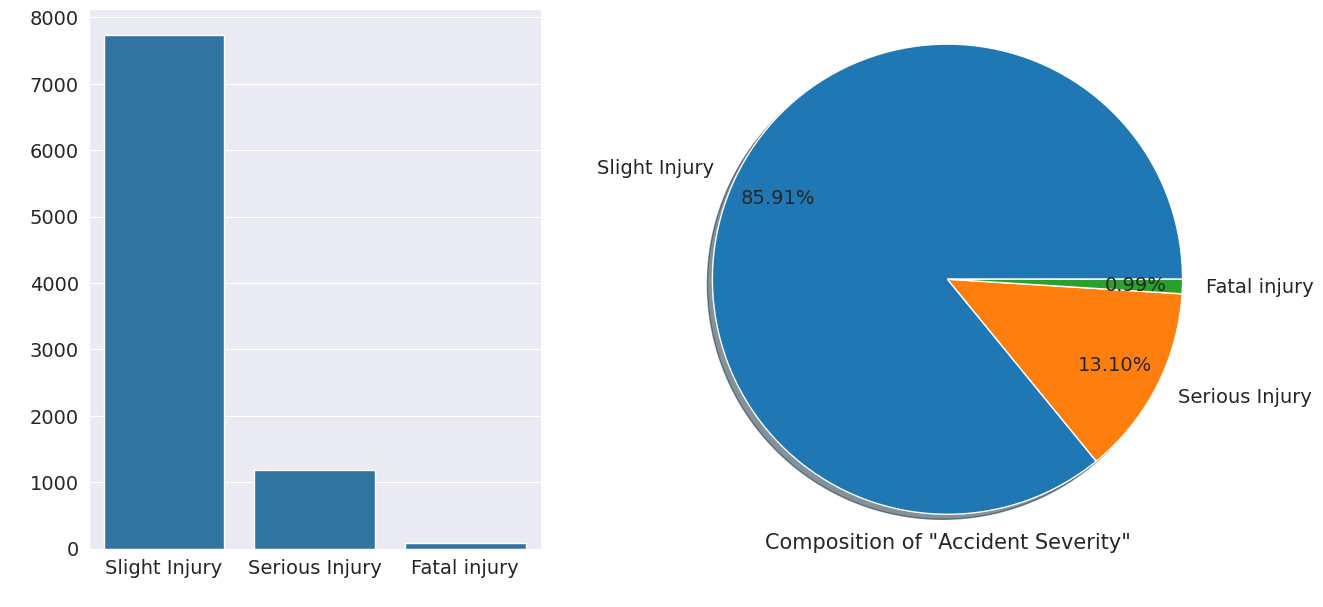

In [ ]:
# checking the target
plt.figure(figsize=(14,7))
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=df["accident_severity"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)
# pieplot
ax2 = plt.subplot(1,2,2)
plt.pie(df["accident_severity"].value_counts(),
        labels=list(df["accident_severity"].unique()[:3]),
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14}
       )
ax2.set_xlabel(" ")
plt.xlabel('Composition of "Accident Severity"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

In [ ]:
# converting 'time' to datetime
df['time'] = pd.to_datetime(df['time'])

# date (day-month-year) time
df["time"].dt.hour

# extracting hour and minute from timestamp
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute
df.drop('time', axis=1, inplace=True)

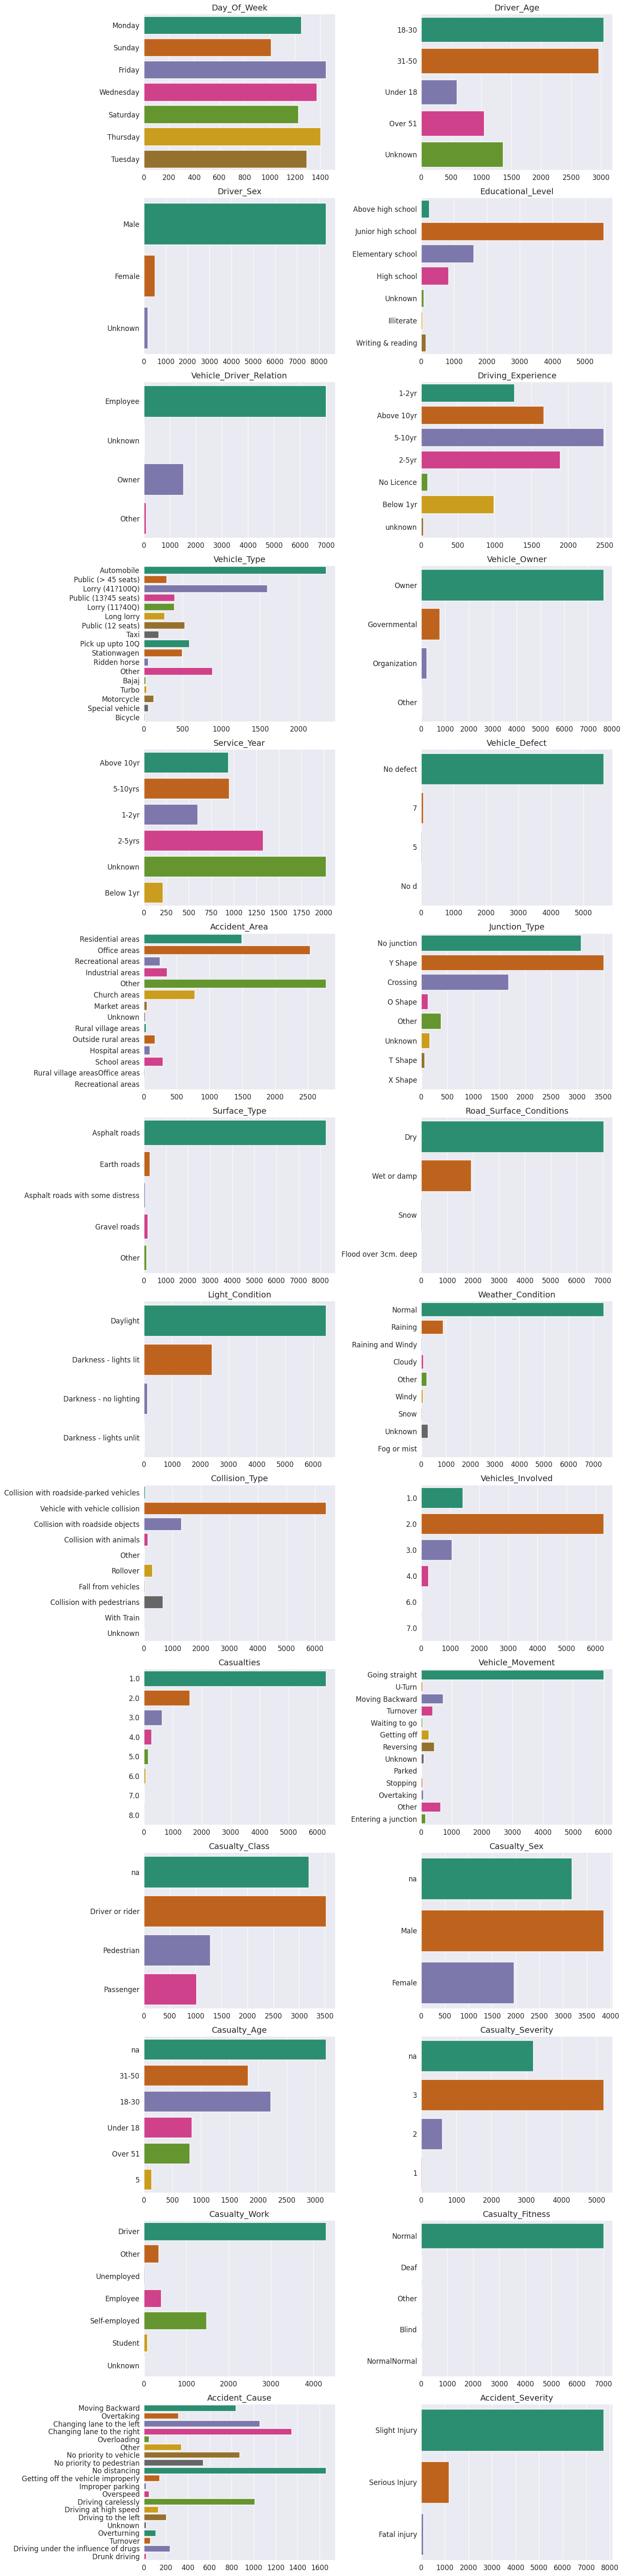

In [ ]:
plt.figure(figsize=(15,70))
plotnumber = 1

for col in df.drop(['hour', 'minute', 'lanes', 'road_allignment', 'pedestrian_movement'], axis=1):
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data=df, y=col, palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

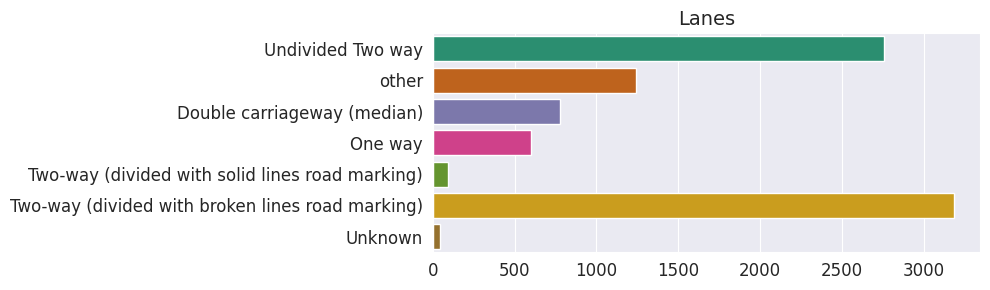

In [ ]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, y='lanes', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

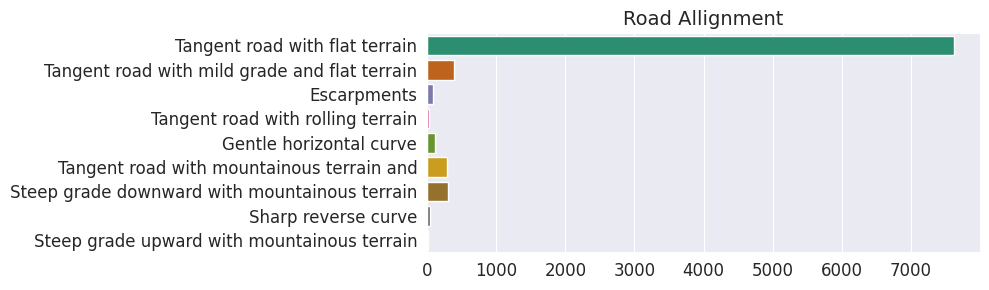

In [ ]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, y='road_allignment', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Road Allignment', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

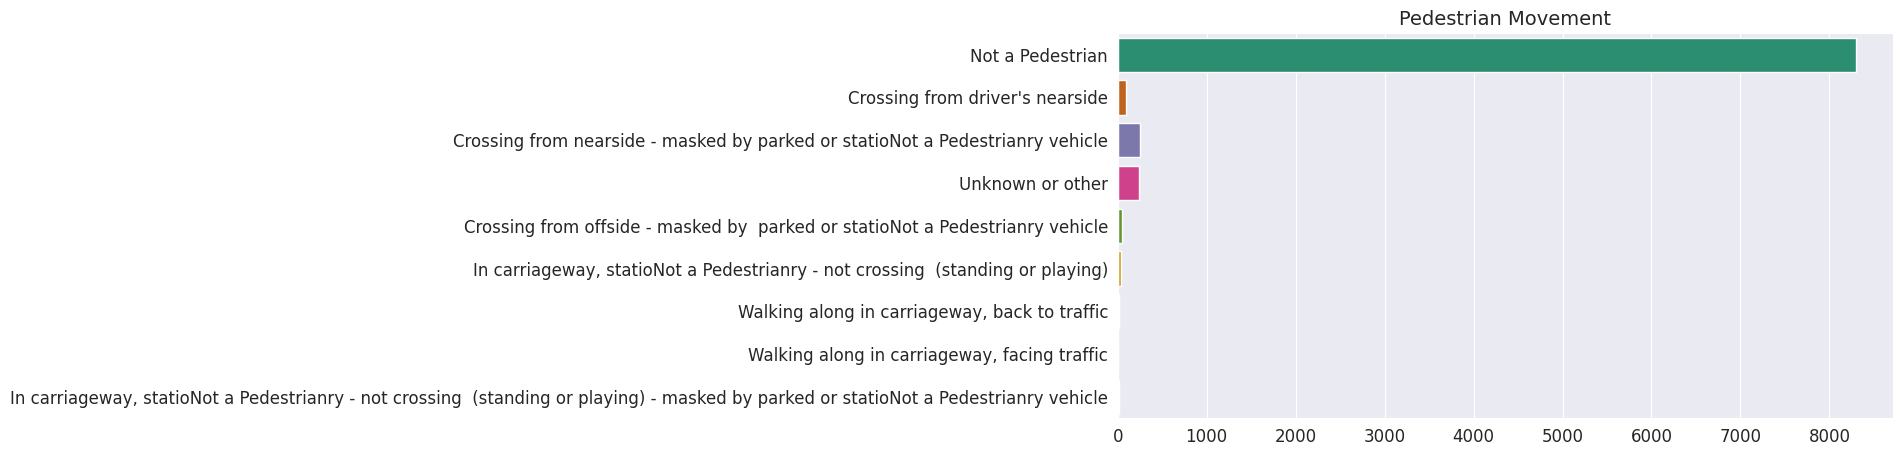

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='pedestrian_movement', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Pedestrian Movement', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

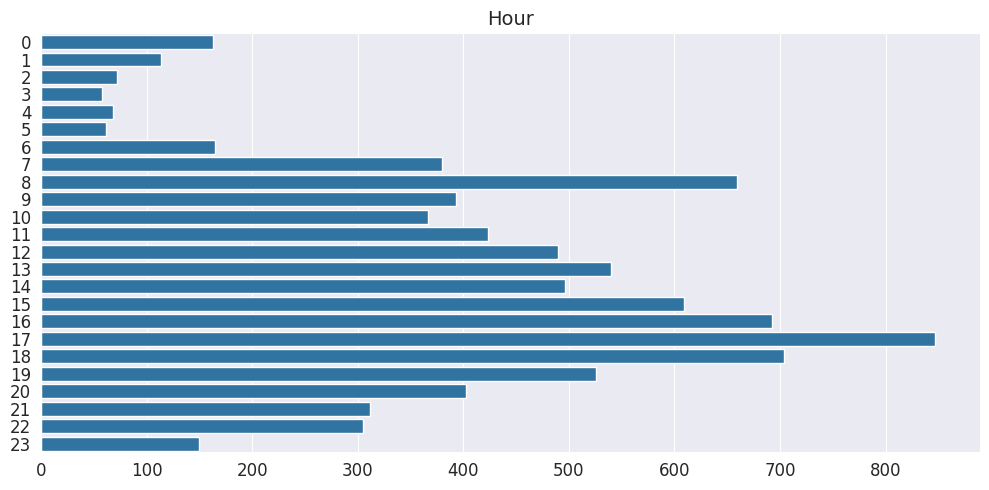

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='hour')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

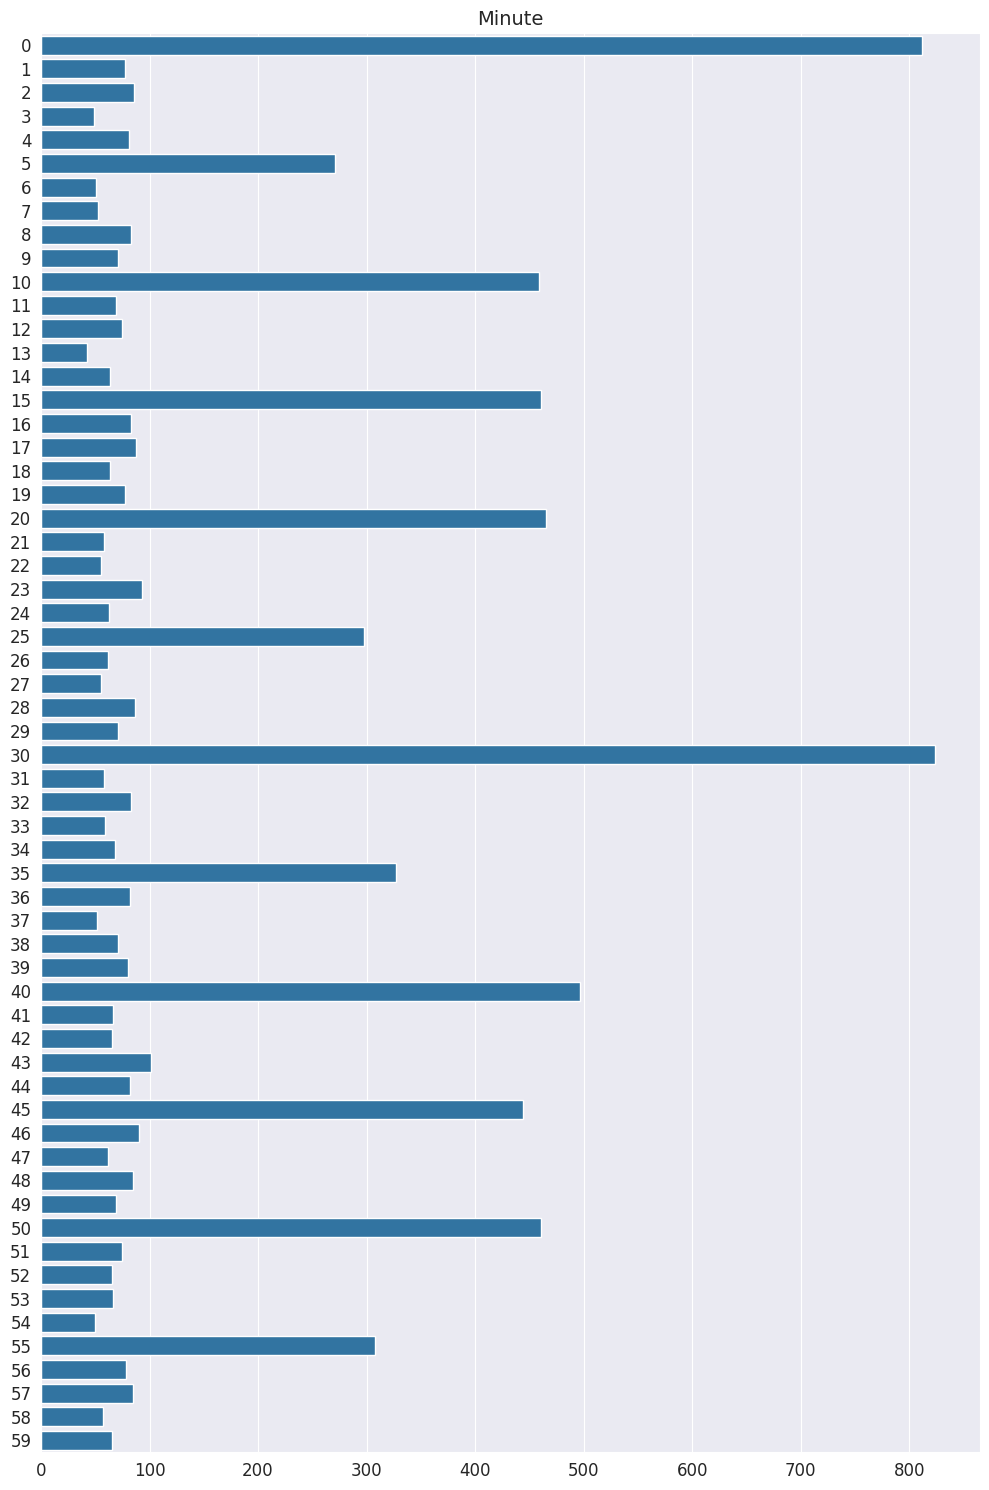

In [ ]:
plt.figure(figsize=(10,15))
sns.countplot(data=df, y='minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>

Most of the accidents:
* involved 2 vehicles and 2 casualties
* occured on Fridays and after noon hours

Most of the drivers:
* are male and in 18-30 yrs age group
* have only went upto Junior high school and are employees
* have 5-10 yrs of driving experience

Most of the accidents happened with personally owned passenger vehicles.

Most of the drivers have met with accident on:
* two-way lanes
* tangent road with flat terrains
* Y shaped junctions
* asphalt roads
* day time
* normal weather conditions

Most of the casualties:
* happened to physically fit male drivers
* are of severity 3

The conditions on which most of the drivers met with the accident are:
* vehicle to vehicle collision
* straight movement
* no pedestrian accidents

Not keeping enough distance between the vehicles was the major cause for most of the accidents and majority of the accidents resulted in slight injury.
    
</div>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* Most of the accidents have taken place between 3pm to 6pm with maximum numbers at 5 pm
* Most of the time in minutes seems to have been recorded in intervals of 5 minutes for the sake of convenience. Hence more numbers to be seen at the 0 and 30 minutes.

In [ ]:
min = list(range(5,56, 5))
def convert_minutes(x: int):
    for m in min:
        if x % m == x and x > m-5:
            return m
        if x in [56,57,58,59]:
            return 0
        if x in min+[0]:
            return x

In [ ]:
df['minute'] = df['minute'].apply(lambda x: convert_minutes(x))

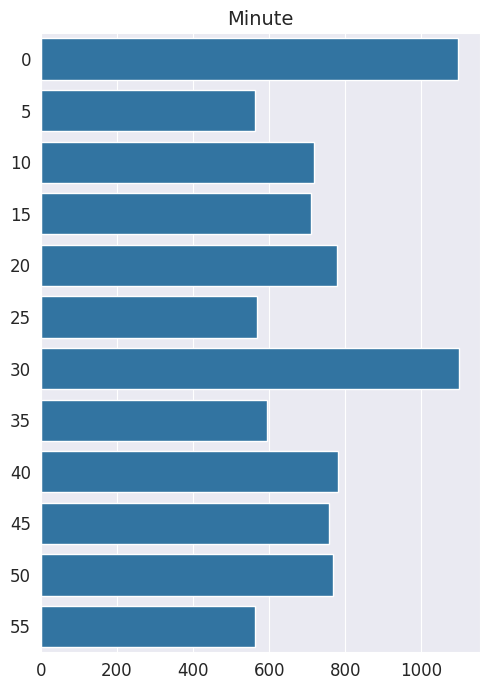

In [ ]:
plt.figure(figsize=(5,7))
sns.countplot(data=df, y='minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* Most of the accidents with fatal injuries happened between 2pm to 7pm.
* Most of the accidents with fatal injuries happened on weekends.
* Highest number of non-fatal injuries happened at 5pm.
* Highest number of non-fatal injuries happened on fridays.
* Most accidents are caused by drivers aged 18-30 and the least by drivers aged under 18.
* Proportion of fatal accidents are lower for female drivers.
* Drivers with 2-5yrs of experience caused most accidents with fatal injury and those with 5-10yrs experience caused most accidents with non-fatal injuries.
* Proportion of fatal injuries caused by vehicles with more than 10yrs of service is lower compared to non-fatal injuries.
* Though most of the accident happened around offices, a higher proportion of accidents happened around residential areas have led to fatal injuries.
* Most accidents with fatal injuries occured on undivided two-ways.
* Most accidents with non-fatal injuries occured on two-way divided with broken lines road marking
* Double carriageway has a lower proportion of fatal accidents compared to non-fatal accidents.
* Severity of accidents increases at places with no junctions and the most number of fatal injuries occured at places with no junctions.
* Crossings and Y-shaped junctions shows a decreasing trend with respect to severity of accidents though the numbers are high.
* Most of the accidents with fatal injury have happened at night.
* Collisions with pedestrians have resulted in more fatal injuries compared to non-fatal injuries.
* Accidents with 4 casualties have a huge proportion on fatal injuries compared to non-fatal injuries.
* Accidents involving drivers with 18-30yrs of age have an increasing pattern with respect to severity of injuries.
* Moving backward led to most of the accidents with fatal injuries whereas failing to keep enough distance between vehicles led to more number of accidents with non-fatal injuries.

In [ ]:
# //////////////////////////////////////////////////////

In [ ]:
hypothesis_df = df.copy(deep=True)

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<h2 align="left"><font color='#0080FF'>Hypothesis 1: Which of both genders is actually dangerous in Driving?</font></h2>
    
<font color='#0080FF'><b>Calculating the Conditional Probability; Probability of an Accident Happen When the Driver is a Female and Repeating the Calculations when it's Male.<br>
P(Gender = Male | Severity = 2) P(Gender = Female | Severity = 2)</b></font>

In [ ]:
((hypothesis_df.groupby(['driver_sex']).size() / hypothesis_df["driver_sex"].count()) * 100).add_prefix('Accidents(in %) Caused by ')

driver_sex
Accidents(in %) Caused by Female      5.645699
Accidents(in %) Caused by Male       92.453879
Accidents(in %) Caused by Unknown     1.900422
dtype: float64

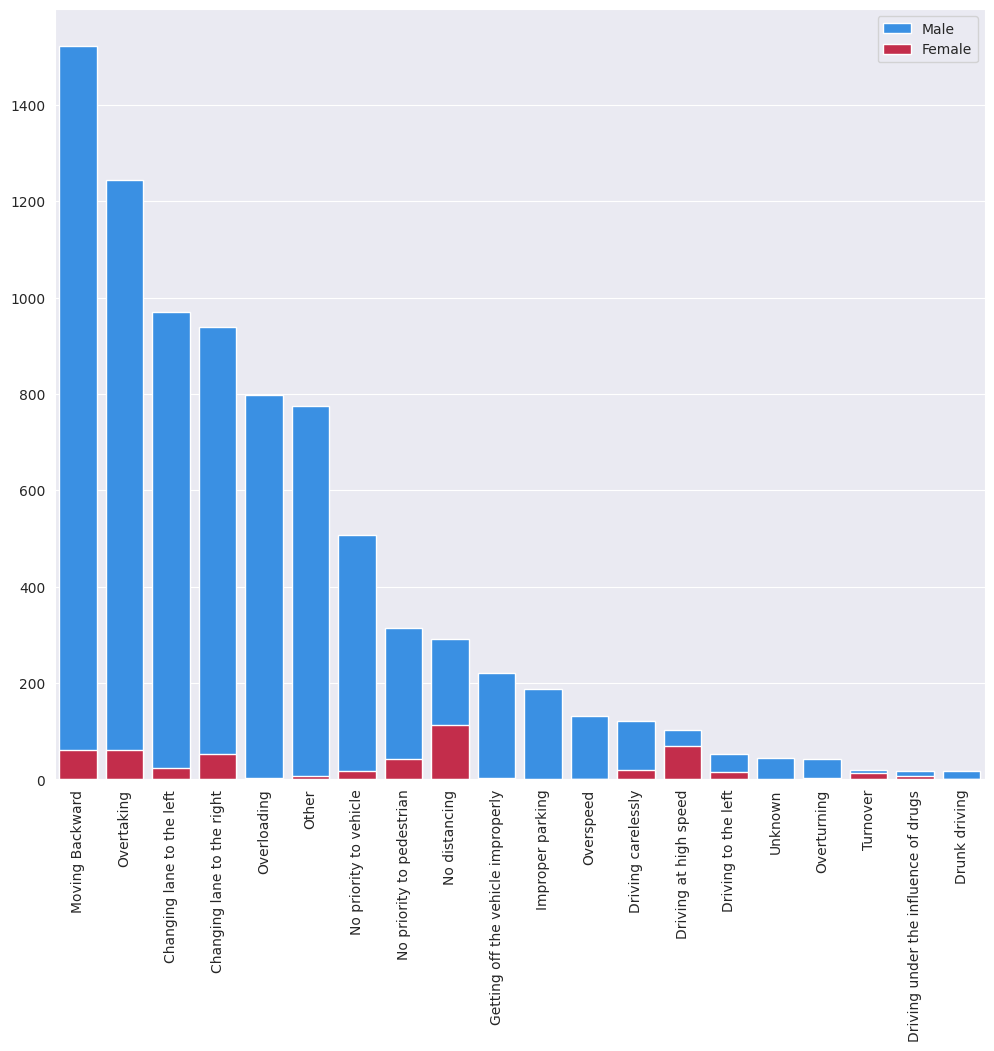

In [ ]:
plt.figure(figsize=(12,10))
male_df = hypothesis_df.loc[hypothesis_df.driver_sex == 'Male']
female_df = hypothesis_df.loc[hypothesis_df.driver_sex == 'Female']
sns.barplot(x = male_df.accident_cause.unique()[:20],y = male_df.accident_cause.value_counts().values,color='dodgerblue', label="Male")
sns.barplot(x = female_df.accident_cause.unique()[:20],y = female_df.accident_cause.value_counts().values,color='crimson', label="Female")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
ff = pd.crosstab(index=hypothesis_df['driver_sex'].loc[hypothesis_df['driver_sex'] !="Unknown"], columns=df['accident_severity']
                 , margins=True)
ff

accident_severity,Fatal injury,Serious Injury,Slight Injury,All
driver_sex,,,,
Female,3,67,438,508
Male,85,1094,7139,8318
All,88,1161,7577,8826


In [ ]:
print("P(Gender = Female | Severity = Fatal) = " + str((ff.iloc[0,0])/(ff.iloc[0,3]*1.0)*100) + '%')
print("P(Gender = Male | Severity = Fatal) = " + str((ff.iloc[1,0])/(ff.iloc[1,3]*1.0)*100) + '%\n')

print("P(Gender = Female | Severity = Serious Injury) = " + str((ff.iloc[0,1])/(ff.iloc[0,3]*1.0)*100) + '%')
print("P(Gender = Male | Severity = Serious Injury) = " + str((ff.iloc[1,1])/(ff.iloc[1,3]*1.0)*100) + '%\n')

print("P(Gender = Female | Severity = Slight Injury) = " + str((ff.iloc[0,2])/(ff.iloc[0,3]*1.0)*100) + '%')
print("P(Gender = Male | Severity = Slight Injury) = " + str((ff.iloc[1,2])/(ff.iloc[1,3]*1.0)*100) + '%')

P(Gender = Female | Severity = Fatal) = 0.5905511811023622%
P(Gender = Male | Severity = Fatal) = 1.0218802596778072%

P(Gender = Female | Severity = Serious Injury) = 13.188976377952756%
P(Gender = Male | Severity = Serious Injury) = 13.152200048088483%

P(Gender = Female | Severity = Slight Injury) = 86.22047244094489%
P(Gender = Male | Severity = Slight Injury) = 85.82591969223371%


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>Observation:</font></h3>
    
Although, the percentage of Accidents done in this sample by males is over 92% but, it doesn't actually indicate that males are more dangerous
If we calculated the probability for each gender we can deduce that both are quite the same.

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<h2 align="left"><font color='#0080FF'>Hypothesis 2: Is Speeding is the main Cause for Car Crashes?</font></h2><br>

In [ ]:
ff = pd.crosstab(index=hypothesis_df['accident_cause'], columns=hypothesis_df['accident_severity'], margins=True)
pd.crosstab(index=hypothesis_df['accident_cause'], columns=hypothesis_df['accident_severity'], margins=True)
ff

accident_severity,Fatal injury,Serious Injury,Slight Injury,All
accident_cause,,,,
Changing lane to the left,10,133,911,1054
Changing lane to the right,16,173,1155,1344
Driving at high speed,0,23,108,131
Driving carelessly,11,136,863,1010
Driving to the left,3,36,165,204
Driving under the influence of drugs,4,26,207,237
Drunk driving,0,2,19,21
Getting off the vehicle improperly,0,16,124,140
Improper parking,1,1,17,19


In [ ]:
print(f'Injuries(all types due to speeding): {ff.iloc[2,2]}/{ff.iloc[3,3]}')
print(f'In percentage: {(ff.iloc[2,2]/ff.iloc[3,3])*100} %')

Injuries(all types due to speeding): 108/1010
In percentage: 10.693069306930694 %


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>Observation:</font></h3>
    
Despite the fact that speeding causes accidents. After analysis it’s found that speeding is not one of the main factors.

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<h2 align="left"><font color='#0080FF'>Hypothesis 3: Do weekends account for more accidents?</font></h2><br>

In [ ]:
ff = pd.crosstab(index=hypothesis_df['day_of_week'], columns=hypothesis_df['accident_severity'], margins=True)
pd.crosstab(index=hypothesis_df['day_of_week'], columns=hypothesis_df['accident_severity'], margins=True)
ff

accident_severity,Fatal injury,Serious Injury,Slight Injury,All
day_of_week,,,,
Friday,2,198,1245,1445
Monday,9,143,1097,1249
Saturday,26,170,1031,1227
Sunday,15,131,862,1008
Thursday,15,189,1198,1402
Tuesday,11,161,1121,1293
Wednesday,11,187,1175,1373
All,89,1179,7729,8997


In [ ]:
print('Accident percentage on weekdays:',round(sum([ff.iloc[i,3] for i in range(0,7) if ff.index[i] not in ['Saturday','Sunday']])/ff.iloc[7,3],2))
print('Accident percentage on weekends:',round(sum([ff.iloc[i,3] for i in range(0,7) if ff.index[i] in ['Saturday','Sunday']])/ff.iloc[7,3],2))

Accident percentage on weekdays: 0.75
Accident percentage on weekends: 0.25


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>Observation:</font></h3>
    
Its quite clear that there is no indication of more accidents happening on weekends

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<h2 align="left"><font color='#0080FF'>Hypothesis 4: Are there more dangerous injuries at night than in day? </font></h2><br>
<font color='#0080FF'>We would consider both fatal and serious to be dangerous injuries</font>

In [ ]:
ff = pd.crosstab(index=hypothesis_df['light_condition'], columns=hypothesis_df['accident_severity'], margins=True)
pd.crosstab(index=hypothesis_df['light_condition'], columns=hypothesis_df['accident_severity'], margins=True)
ff

accident_severity,Fatal injury,Serious Injury,Slight Injury,All
light_condition,,,,
Darkness - lights lit,33,327,2045,2405
Darkness - lights unlit,0,7,11,18
Darkness - no lighting,5,26,92,123
Daylight,51,819,5581,6451
All,89,1179,7729,8997


In [ ]:
sol = 0
for i in [0,1]:
    for j in [0,1,2]:
        sol += ff.iloc[j,i]

r = sol/(sum(ff.iloc[i,3] for i in [0,1,2]))
print('Dangerous injuries at night:',round(r,2),'%')
r = sum(ff.iloc[i,2] for i in [0,1,2])/sum(ff.iloc[i,3] for i in [0,1,2])
print('Slight injuries at night:',round(r,2),'%')

Dangerous injuries at night: 0.16 %
Slight injuries at night: 0.84 %


In [ ]:
r = sum(ff.iloc[3,i] for i in [0,1])/ff.iloc[3,3]
print('Dangerous injuries at day:',round(r,2),'%')
r = ff.iloc[3,2]/ff.iloc[3,3]
print('Slight injuries at day:',round(r,2),'%')

Dangerous injuries at day: 0.13 %
Slight injuries at day: 0.87 %


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>Observation:</font></h3>
    
Although it does that in daylight there are more number of accidents but the dangerous injuries percentage are almost same either be it day or night.

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<h2 align="left"><font color='#0080FF'>Hypothesis 5: More accidents under some specific non-normal weather? </font></h2><br>
<font color='#0080FF'>We would not consider normal weather</font>

In [ ]:
ff = pd.crosstab(index=hypothesis_df['weather_condition'], columns=hypothesis_df['accident_severity'], margins=True)
pd.crosstab(index=hypothesis_df['weather_condition'], columns=hypothesis_df['accident_severity'], margins=True)
ff.drop(['Normal','All'],axis=0)

accident_severity,Fatal injury,Serious Injury,Slight Injury,All
weather_condition,,,,
Cloudy,0,8,67,75
Fog or mist,0,1,5,6
Other,0,24,196,220
Raining,7,101,781,889
Raining and Windy,0,2,26,28
Snow,0,5,28,33
Unknown,0,34,233,267
Windy,0,12,52,64


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>Observation:</font></h3>
    
Without any analysis we can clearly see that rainy weather causes more accident and also all the fatal injuries have occured under non-normal conditions are there in rainy weather

In [ ]:
# ///////////////////////////

# <span style="font-family:cursive;text-align:center">⚙️ Preprocessing</span>

In [ ]:
# / RTA DATASET


# null values (imputation, missing values)
# high variability (encoding)
# imbalance (sampling)



In [ ]:
df.isna().sum()

day_of_week                   0
driver_age                    0
driver_sex                    0
educational_level           521
vehicle_driver_relation     377
driving_experience          598
vehicle_type                715
vehicle_owner               351
service_year               2957
vehicle_defect             3288
accident_area               176
lanes                       296
road_allignment             114
junction_type                 1
surface_type                127
road_surface_conditions       1
light_condition               1
weather_condition             1
collision_type              106
vehicles_involved             1
casualties                    1
vehicle_movement            211
casualty_class                1
casualty_sex                  1
casualty_age                  1
casualty_severity             1
casualty_work              2352
casualty_fitness           1943
pedestrian_movement           1
accident_cause                1
accident_severity             1
hour    

In [ ]:
# > 80% you can drop (the column should also be insignificant)
# < 80%
#    - replacing (mean, median, mode)
#    - forward, backward
#    - imputers (predict numm values) (knn imputer, simple imputer)



# "na" "unknown" NaN

# MAR, MNAR, MCAR

# Missing not at random  -  have not been found (cannot be replaced by any value) (extra category)



In [ ]:
# dropping columns that can cause imbalance while imputation
df.drop(columns = ['vehicle_defect', 'vehicle_driver_relation', 'casualty_work', 'casualty_fitness'], inplace=True)

In [ ]:
impute_cols = [x for x in df.isna().sum()[df.isna().sum() != 0].index.tolist()]
for feat in impute_cols:
    mode = df[feat].mode()[0]
    df[feat].fillna(mode, inplace=True)

In [ ]:
df.isna().sum()

day_of_week                0
driver_age                 0
driver_sex                 0
educational_level          0
driving_experience         0
vehicle_type               0
vehicle_owner              0
service_year               0
accident_area              0
lanes                      0
road_allignment            0
junction_type              0
surface_type               0
road_surface_conditions    0
light_condition            0
weather_condition          0
collision_type             0
vehicles_involved          0
casualties                 0
vehicle_movement           0
casualty_class             0
casualty_sex               0
casualty_age               0
casualty_severity          0
pedestrian_movement        0
accident_cause             0
accident_severity          0
hour                       0
minute                     0
dtype: int64

### <span style="font-family:cursive;text-align:center"> Encoding</span>

In [ ]:
# lC =>data convert
# dataframe => convert => np.split
# dataframe => split => LabelConder => ColummTransform => Pipeline(ct , model)
# makecolumntransform()
# ColummTransform()

In [ ]:
# label encoding: ordinal (order) ranks (V)
# one-hot encoding (binary) nominal data 0,1 (X)

# target encoding (look into it in the second)

In [ ]:
# If you are using a pre-built function => split data before encoding
# if you are using own function => you can do either

#  ideally split the data

In [ ]:
def ordinal_encoder(df, feats):
    for feat in feats:
        feat_val = list(np.arange(df[feat].nunique()))
        feat_key = list(df[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        df[feat] = df[feat].map(feat_dict)
    return df

df = ordinal_encoder(df, df.drop(['accident_severity'], axis=1).columns)
df.shape

(8998, 29)

In [ ]:
df.head()

,day_of_week,driver_age,driver_sex,educational_level,driving_experience,vehicle_type,vehicle_owner,service_year,accident_area,lanes,road_allignment,junction_type,surface_type,road_surface_conditions,light_condition,weather_condition,collision_type,vehicles_involved,casualties,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,pedestrian_movement,accident_cause,accident_severity,hour,minute
0,1,0,1,0,0,0,3,3,9,2,5,1,0,0,3,2,3,1,1,2,3,2,5,3,5,9,Slight Injury,17,1
1,1,1,1,4,3,11,3,2,6,4,5,1,0,0,3,2,8,1,1,2,3,2,5,3,5,16,Slight Injury,17,1
2,1,0,1,4,0,5,3,5,1,6,5,1,0,0,3,2,2,1,1,2,0,1,1,2,5,0,Serious Injury,17,1
3,3,0,1,4,2,11,0,5,6,6,6,7,2,0,0,2,8,1,1,2,2,0,0,2,5,1,Slight Injury,1,2
4,3,0,1,4,1,0,3,2,4,6,5,7,0,0,0,2,8,1,1,2,3,2,5,3,5,16,Slight Injury,1,2


<Axes: >

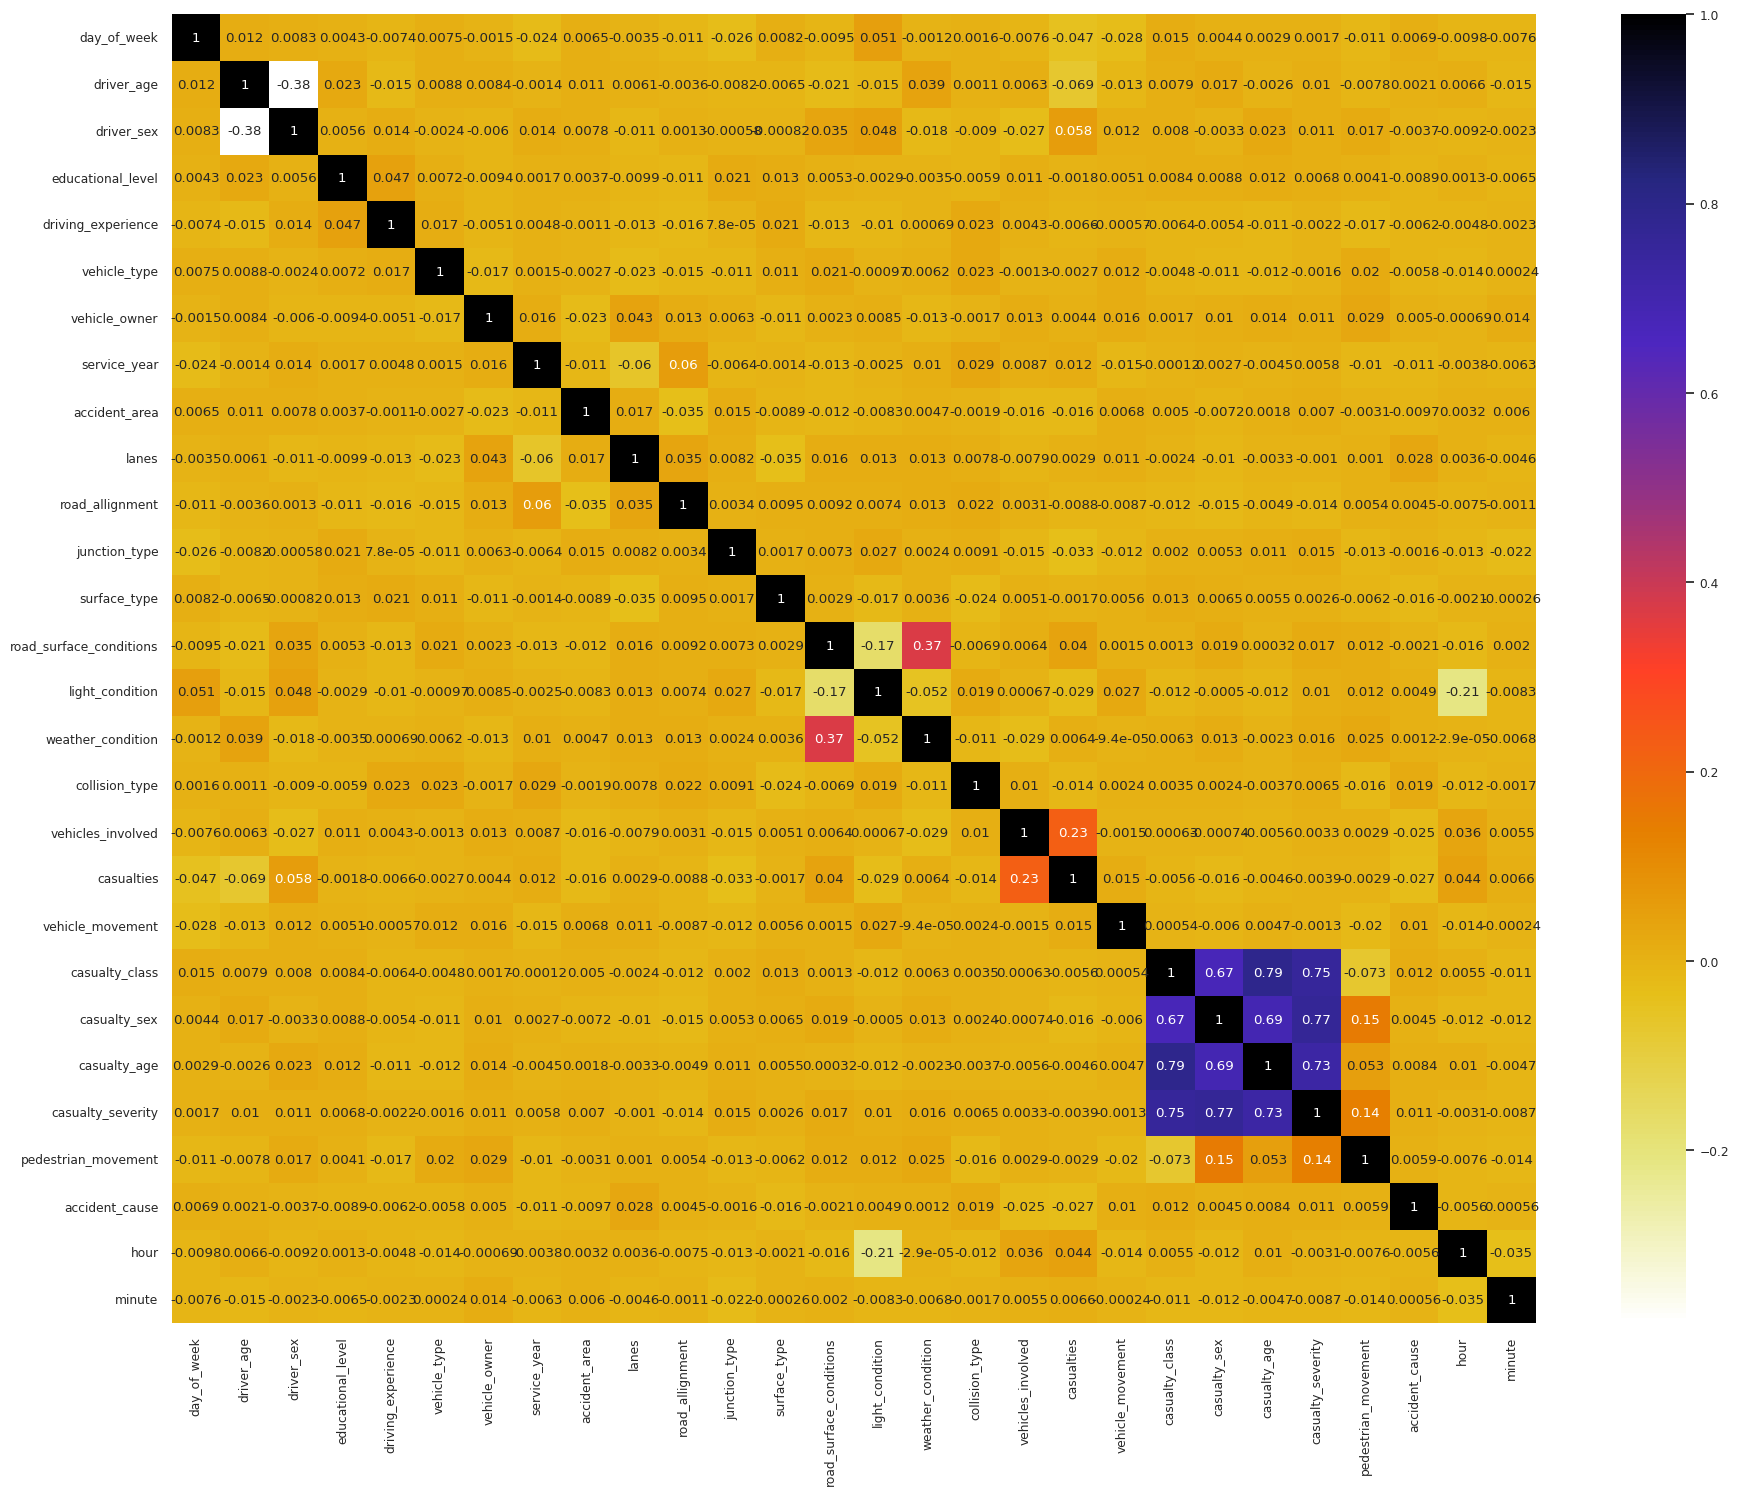

In [ ]:
plt.figure(figsize=(22,17))
sns.set(font_scale=0.8)
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.CMRmap_r)

### <span style="font-family:cursive;text-align:center"> Upsampling</span>

In [ ]:
X = df.drop('accident_severity', axis=1)
y = df['accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6298, 28) (2700, 28) (6298,) (2700,)


In [ ]:
# upsampling using smote

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_train.shape, y_train.shape)

Class= Slight Injury, n=5429 (86.20%)
Class= Serious Injury, n=808 (12.83%)
Class= Fatal injury, n=61 (0.97%)
Class= Slight Injury, n=5429 (33.33%)
Class= Serious Injury, n=5429 (33.33%)
Class= Fatal injury, n=5429 (33.33%)
Upsampled data shape:  (16287, 28) (16287,)


In [ ]:
y_test = ordinal_encoder(pd.DataFrame(y_test, columns = ['accident_severity']), pd.DataFrame(y_test, columns = ['accident_severity']).columns)['accident_severity']
y_train = ordinal_encoder(pd.DataFrame(y_train, columns = ['accident_severity']), pd.DataFrame(y_train, columns = ['accident_severity']).columns)['accident_severity']

# <span style="font-family:cursive;text-align:center">🧰 Baseline Modelling</span>

In [ ]:
# analysis on the data => obs, ded, problem
# preprocessing (data cleaning) => prepared dataset ideal for modeling  + feature eng. ()
# modeling



# algorithm(data)  => model
# relation value  => statistics  => prediction





In [ ]:
def modelling(X_train, y_train, X_test, y_test, **kwargs):
    scores = {}
    models = []
    bvd = {}
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = XGBClassifier()
        xgb.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
        y_pred = xgb.predict(X_test._get_numeric_data())
        scores['xgb']= [accuracy_score(y_test, y_pred)]
        models.append(xgb)


    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestClassifier(n_estimators=200)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores['rf']= [accuracy_score(y_test, y_pred)]
        models.append(rf)

    if 'extree' in kwargs.keys() and kwargs['extree']:
        extree = ExtraTreesClassifier()
        extree.fit(X_train, y_train)
        y_pred = extree.predict(X_test)
        scores['extree'] = [accuracy_score(y_test, y_pred)]
        models.append(extree)

    return scores,models

In [ ]:
scores,models = modelling(X_train,y_train, X_test, y_test, xgb=True, rf=True, extree=True)
print(scores)

{'xgb': [0.8051851851851852], 'rf': [0.817037037037037], 'extree': [0.8288888888888889]}


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Accuracy Scores:</u></b><br>
    
*  XGB -> 79.62%<br>
*  Random Forrest -> 80.05%<br>
*  Extra Trees -> 81.05%<br>
  
</div>

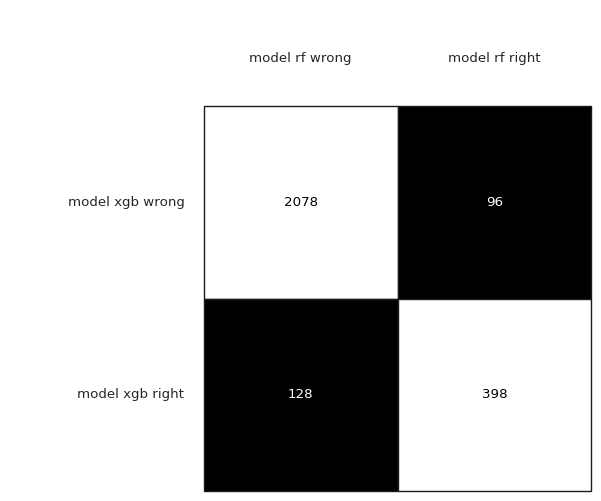

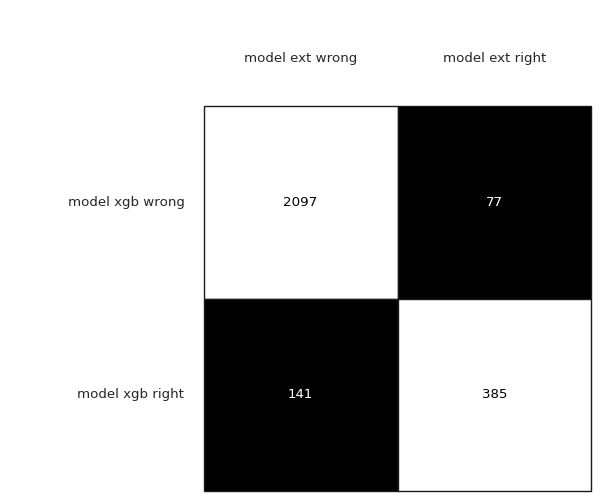

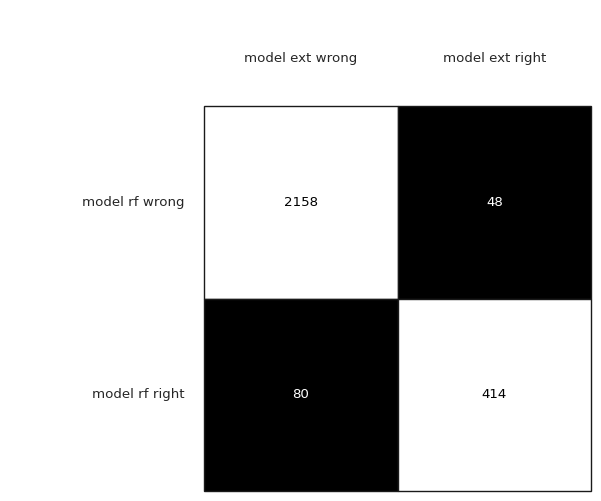

In [ ]:
y_pred_xgb = models[0].predict(X_test)
y_pred_rf = models[1].predict(X_test)
y_pred_ext = models[2].predict(X_test)


tb = mcnemar_tables(y_test,
                    y_pred_xgb,
                    y_pred_rf,
                    y_pred_ext)

brd = checkerboard_plot(tb['model_0 vs model_1'],
                        figsize=(5, 5),
                        fmt='%d',
                        col_labels=['model rf wrong', 'model rf right'],
                        row_labels=['model xgb wrong', 'model xgb right'])
plt.show()

brd = checkerboard_plot(tb['model_0 vs model_2'],
                        figsize=(5, 5),
                        fmt='%d',
                        col_labels=['model ext wrong', 'model ext right'],
                        row_labels=['model xgb wrong', 'model xgb right'])
plt.show()

brd = checkerboard_plot(tb['model_1 vs model_2'],
                        figsize=(5, 5),
                        fmt='%d',
                        col_labels=['model ext wrong', 'model ext right'],
                        row_labels=['model rf wrong', 'model rf right'])
plt.show()

In [ ]:
def model_performance(model, y_test, y_hat) :
    conf_matrix = confusion_matrix(y_test, y_hat)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)", "2 (pred)"],
                        y = ["0 (true)","1 (true)", "2 (true)"],xgap = 2, ygap = 2,
                        colorscale = 'Viridis', showscale  = False)

    #Show metrics
    Accuracy  =  accuracy_score(y_test, y_hat)
    Precision =  precision_score(y_test, y_pred, average= 'weighted')
    Recall    =  recall_score(y_test, y_pred, average= 'weighted')
    F1_score  =  f1_score(y_test, y_pred, average= 'weighted')

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values),
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))


    #plots
    model = model

    #Subplots
    fig = tls.make_subplots(rows=2, cols=1, print_grid=False,
                          subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        ))

    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,2,1)

    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(model),
                        autosize = True, height = 800,width = 800,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        # margin = dict(b = 100)
                        )
    fig.layout.titlefont.size = 14

    py.iplot(fig,filename='model-performance')

In [ ]:
extree = ExtraTreesClassifier()
extree.fit(X_train, y_train)
y_pred = extree.predict(X_test)

In [ ]:
extree.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
print(model_performance(extree,y_test, y_pred))

None


In [ ]:
# modeling

# rf, xgb, extratrees

# compared the scores
# check (heatmap)
# compared recall/f1/precision


# you decided on an algo



# [material]  => constant (data)
# [capabilities] => variables (hyperparameters)



# param range of change
# estimator model
# search algo

# <span style="font-family:cursive;text-align:center">🛠️ Hyperparameter Tuning</span>

In [ ]:
gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train, y=y_train)

# A parameter grid for ETrees
params = {
    'n_estimators': range(100, 500, 100),  # [100,200,300,400,500]
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini'],
    'max_depth': [5,11],
    'min_samples_split': [2,3],
}

extree_estimator = ExtraTreesClassifier()

gsearch = GridSearchCV(
    estimator= extree_estimator,
    param_grid= params,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf,
    verbose=1,
)


extree_model = gsearch.fit(X=X_train, y=y_train)
(gsearch.best_params_, gsearch.best_score_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


({'ccp_alpha': 0.0,
  'criterion': 'gini',
  'max_depth': 11,
  'min_samples_split': 2,
  'n_estimators': 400},
 0.8909464667078786)

<div class="alert alert-block alert-success" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
   <b><u>Parameters:</u></b>
  'ccp_alpha':<span style="color:red">0.0</span>,
  'criterion': <span style="color:red">'gini'</span>,
  'max_depth': <span style="color:red">11</span>,
  'min_samples_split': <span style="color:red">2</span>,
  'n_estimators': <span style="color:red">400</span>
<br>
<b><u>Best Score: </u></b><span style="color:red">0.86</span><br>
</div>

In [ ]:
gkf2 = KFold(n_splits=3, shuffle=True, random_state=101).split(X=X_train, y=y_train)

params2 = {
    'max_depth': [11,15],
    'min_samples_split': [2,3],
    'class_weight': ['balanced', None],

}

extree2 = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                max_depth = 11,
                                min_samples_split = 3)

gsearch2 = GridSearchCV(
    estimator= extree2,
    param_grid= params2,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf2,
    verbose=3,
)

extree_model2 = gsearch2.fit(X=X_train, y=y_train)

(gsearch2.best_params_, gsearch2.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


({'class_weight': 'balanced', 'max_depth': 15, 'min_samples_split': 2},
 0.9348768962249941)

<div class="alert alert-block alert-success" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
   <b><u>Parameters:</u></b>
  'class_weight':<span style="color:red">balanced</span>,
  'max_depth': <span style="color:red">15</span>,
  'min_samples_split': <span style="color:red">2</span>,
<br>
<b><u>Best Score: </u></b><span style="color:red">0.92</span><br>
</div>

In [ ]:
extree_tuned = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                min_samples_split = 2,
                                class_weight = 'balanced',
                                max_depth = 15,
                                n_estimators = 400)

extree_tuned.fit(X_train, y_train)

ExtraTreesClassifier(class_weight='balanced', max_depth=15, n_estimators=400)

In [ ]:
print(extree_tuned.feature_importances_)

[0.06683355 0.05250564 0.01485896 0.03164993 0.04389171 0.0364679
 0.02564885 0.03506854 0.02529913 0.03423683 0.01360747 0.04441135
 0.01024213 0.04697771 0.05484719 0.02033738 0.03553483 0.05828065
 0.07333972 0.02262416 0.02703941 0.02806163 0.02832195 0.01994212
 0.01007405 0.03604071 0.04608529 0.0577712 ]


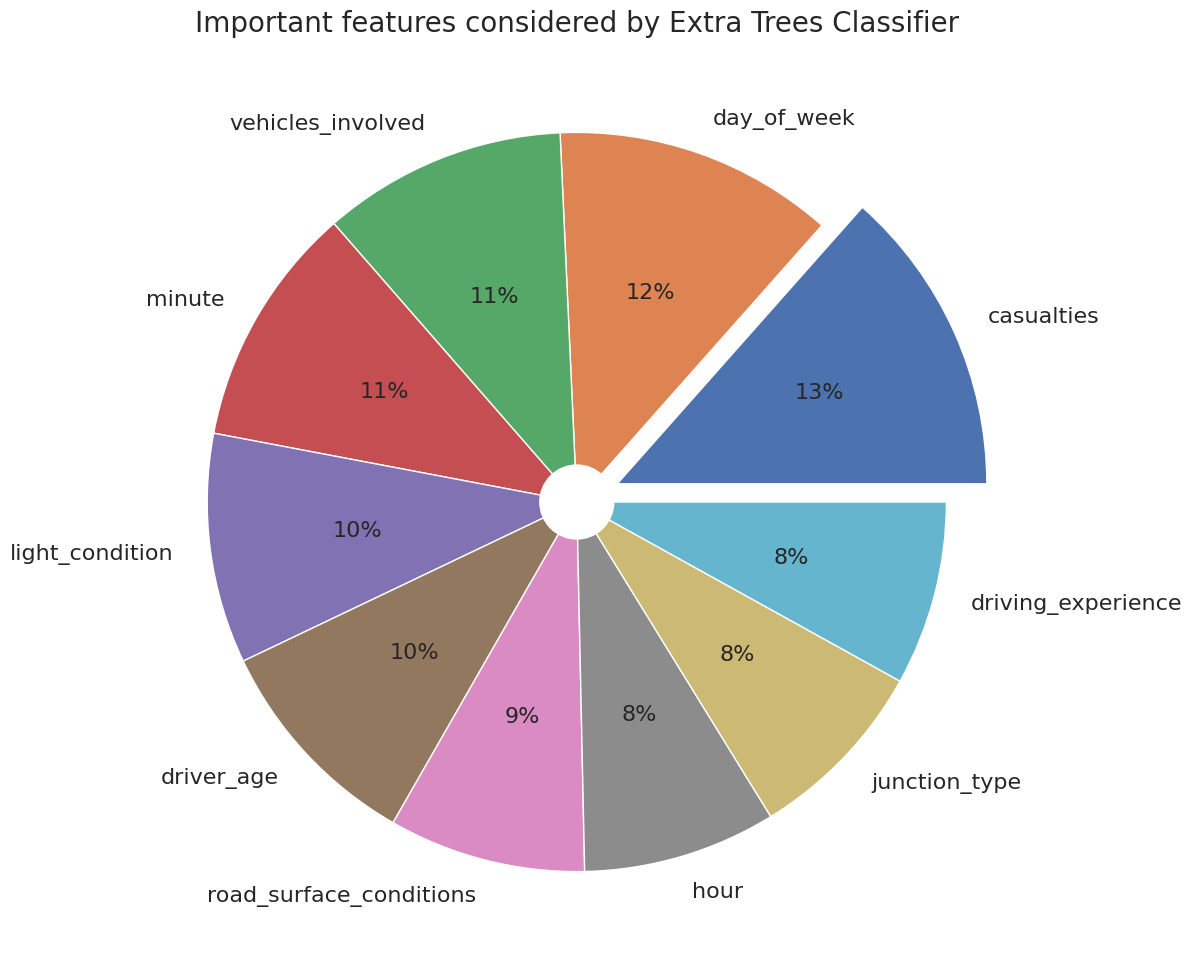

In [ ]:
feat_importances = pd.Series(extree_tuned.feature_importances_, index=X.columns)
plt.figure(figsize=(12,12))
myexplode = [0.12,0,0,0,0,0,0,0,0,0]
plt.pie(feat_importances.nlargest(10),labels=feat_importances.nlargest(10).index, autopct='%.0f%%',explode= myexplode,
        textprops={'fontsize': 16})
centre_circle = plt.Circle((0,0),0.10,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Important features considered by Extra Trees Classifier',fontsize=20)
plt.show()

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 5.0 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
shap.initjs()

In [ ]:
sample_set = X_train.sample(10)

In [ ]:
explainer = shap.Explainer(extree_tuned)

In [ ]:
shap_values_beeswarm = explainer(sample_set,check_additivity=False)

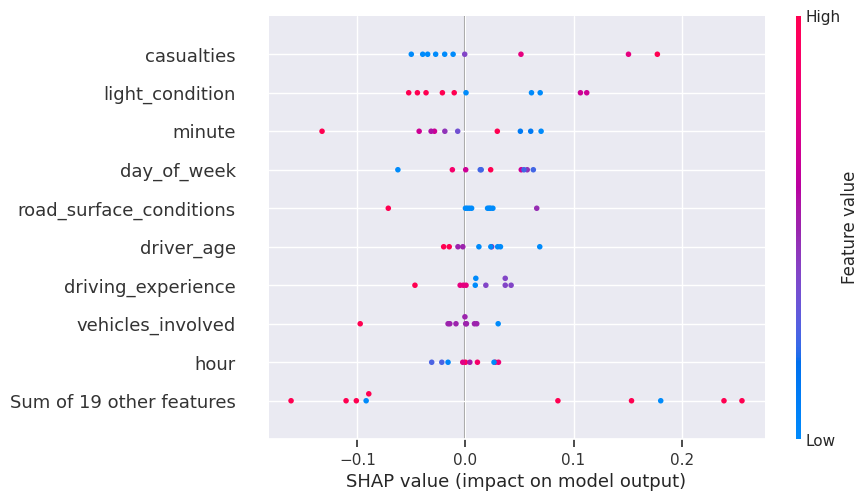

In [ ]:
shap.plots.beeswarm(shap_values_beeswarm[:,:,0])

#Evident

In [ ]:
!pip install evidently

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.1/509.1 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.9/223.9 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.3/210.3 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 49.6 MB/s eta 0:00:00


In [ ]:
import evidently
from evidently.report import Report
from evidently.metric_preset import ClassificationPreset
from evidently.pipeline.column_mapping import ColumnMapping

### <span style="font-family:cursive;text-align:center">ExtraTreesClassifier vs Test 🌲🌲🌲</span>

In [ ]:
train_probas = pd.DataFrame(extree_tuned.predict_proba(X_train))
train_probas.columns = ['Slight Injury', 'Serious Injury', 'Fatal injury']

test_probas = pd.DataFrame(extree_tuned.predict_proba(X_test))
test_probas.columns = ['Slight Injury', 'Serious Injury', 'Fatal injury']

In [ ]:
train_data,test_data = X_train.copy(deep=True),X_test.copy(deep=True)